In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from keras.datasets import imdb
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.preprocessing import image
import numpy as np 
import matplotlib.pyplot as plt
from keras.applications import vgg16
import cv2 as cv
import xml.etree.ElementTree as ET
from os import listdir
import shutil, os
from os.path import isfile, join
import os
from PIL import Image

In [2]:
image_size=(208, 208)
batch_size= 32
seed =142

In [3]:
#обучающий датасет и датасет валидации
train_ds = image_dataset_from_directory(directory='training_set', validation_split=0.1, subset="training", image_size=image_size, seed =seed ,batch_size= batch_size)
valid_ds = image_dataset_from_directory(directory='test_set', validation_split = 0.1, subset="validation", image_size=image_size, seed =seed ,batch_size= batch_size)

Found 16030 files belonging to 2 classes.
Using 14427 files for training.
Found 4070 files belonging to 2 classes.
Using 407 files for validation.


In [4]:
#Тренировочный датасет

#test_ds = image_dataset_from_directory(directory='test_set',image_size=image_size ,batch_size=batch_size)

<BatchDataset shapes: ((None, 208, 208, 3), (None,)), types: (tf.float32, tf.int32)>

In [5]:
#Оптимизацияя (Используем ЦП для подгрузки изображений)
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.prefetch(buffer_size=AUTOTUNE)
#test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [2]:
model = keras.Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(208, 208, 3)),  # свёрточный слой
    #попробуй по 2-3 свёрточных слоя сделать
    MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
    Dropout(0.2),  # отключение 20 процентов нейронов

    Conv2D(128, (3, 3), activation='relu'),  # свёрточный слой
    MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
    Dropout(0.2),  # отключение 20 процентов нейронов

    Conv2D(256, (3, 3), activation='relu'),  # свёрточный слой
    MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
    Dropout(0.2),  # отключение 20 процентов нейронов

    Conv2D(256, (3, 3), activation='relu'),  # свёрточный слой
    MaxPooling2D((2, 2), strides=2),  # уменьшеи карт признаков
    Dropout(0.2),  # отключение 20 процентов нейронов

    Conv2D(512, (3, 3), activation='relu'),  # свёрточный слой
    MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
    Dropout(0.2),  # отключение 20 процентов нейронов

    Conv2D(512, (3, 3), activation='relu'),  # свёрточный слой
    MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
    Dropout(0.2),  # отключение 20 процентов нейронов

    Flatten(),
    Dense(512, activation='relu'),  # обычные нейроны
    Dropout(0.2),  # отключение 20 процентов нейронов
    Dense(256, activation='relu'),  # обычные нейроны
    Dropout(0.2),  # отключение 20 процентов нейронов
    Dense(128, activation='relu'),  # обычные нейроны
    Dropout(0.2),  # отключение 20 процентов нейронов
    Dense(1, activation='sigmoid'),  # выходной слой
])


NameError: name 'tf' is not defined

In [3]:
#sparse_categorical_crossentropy
#binary_crossentropy
#categorical_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: name 'model' is not defined

In [8]:
his = model.fit(train_ds, validation_data = valid_ds, epochs=30,  batch_size=batch_size)

Epoch 1/60
451/451 [==============================] - 56s 109ms/step - loss: 0.7081 - accuracy: 0.8088 - val_loss: 0.2358 - val_accuracy: 0.9115
Epoch 2/60
451/451 [==============================] - 47s 103ms/step - loss: 0.2367 - accuracy: 0.9130 - val_loss: 0.2478 - val_accuracy: 0.9091
Epoch 3/60
451/451 [==============================] - 47s 103ms/step - loss: 0.1940 - accuracy: 0.9310 - val_loss: 0.2847 - val_accuracy: 0.9165
Epoch 4/60
451/451 [==============================] - 48s 104ms/step - loss: 0.1648 - accuracy: 0.9432 - val_loss: 0.1877 - val_accuracy: 0.9386
Epoch 5/60
451/451 [==============================] - 48s 105ms/step - loss: 0.1284 - accuracy: 0.9555 - val_loss: 0.2543 - val_accuracy: 0.9312
Epoch 6/60
451/451 [==============================] - 48s 105ms/step - loss: 0.1197 - accuracy: 0.9567 - val_loss: 0.1765 - val_accuracy: 0.9558
Epoch 7/60
451/451 [==============================] - 48s 105ms/step - loss: 0.1328 - accuracy: 0.9529 - val_loss: 0.1808 - val_ac

In [9]:
model.save('cars_60_epochs.h5')

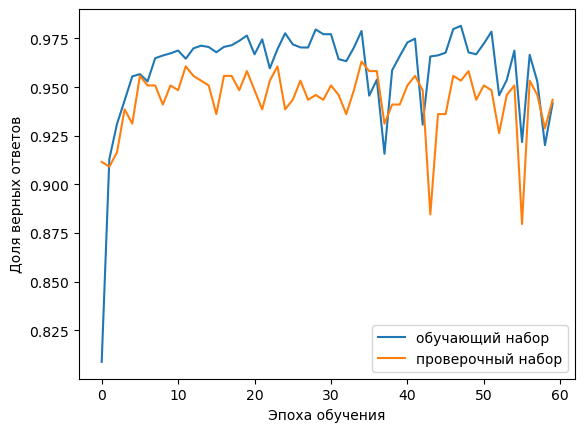

In [10]:
plt.plot(his.history['accuracy'],
         label='обучающий набор')
plt.plot(his.history['val_accuracy'],
         label='проверочный набор')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()